In [15]:
#Подключаем библиотеки
import numpy as np
from tensorflow.keras import datasets, layers, models, utils
import matplotlib.pyplot as plt

In [16]:
#Загружаем датасет
(X_train, Y_train), (X_test, Y_test) = datasets.mnist.load_data()
num_classes = 10

In [17]:
'''Переодим массивы X_train и X_test в 4-х мерный вид, т.к. сверточный слой Conv2D 
принимает в параметр input_shape 4D тензор с формой: 
batch_shape + (rows, cols, channels), если data_format = 'channels_last' ''' 
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)
print('Форма X_train :', X_train.shape)
print('Форма Y_train :', Y_train.shape)
print('Форма X_test :', X_test.shape)
print('Форма Y_test :', Y_test.shape)

Форма X_train : (60000, 28, 28, 1)
Форма Y_train : (60000,)
Форма X_test : (10000, 28, 28, 1)
Форма Y_test : (10000,)


In [18]:
#Переводим labels(метки) Y_train и Y_test из цифр от 0 до 9 в вектора из 10 элементов
print('До перевода:', Y_train[0])
Y_train = utils.to_categorical(Y_train, num_classes)
Y_test = utils.to_categorical(Y_test, num_classes)
print('После перевода', Y_train[0])

До перевода: 5
После перевода [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [19]:
'''Делим X_train и X_test на 255, чтобы привести все значения к промежутку от 0 до 1,
т.к. это np.array 4-х мерный массив, в котором хранятся значения 
пикселей(значения от 0 до 255)'''
X_train = X_train / 255.0
X_test = X_test / 255.0

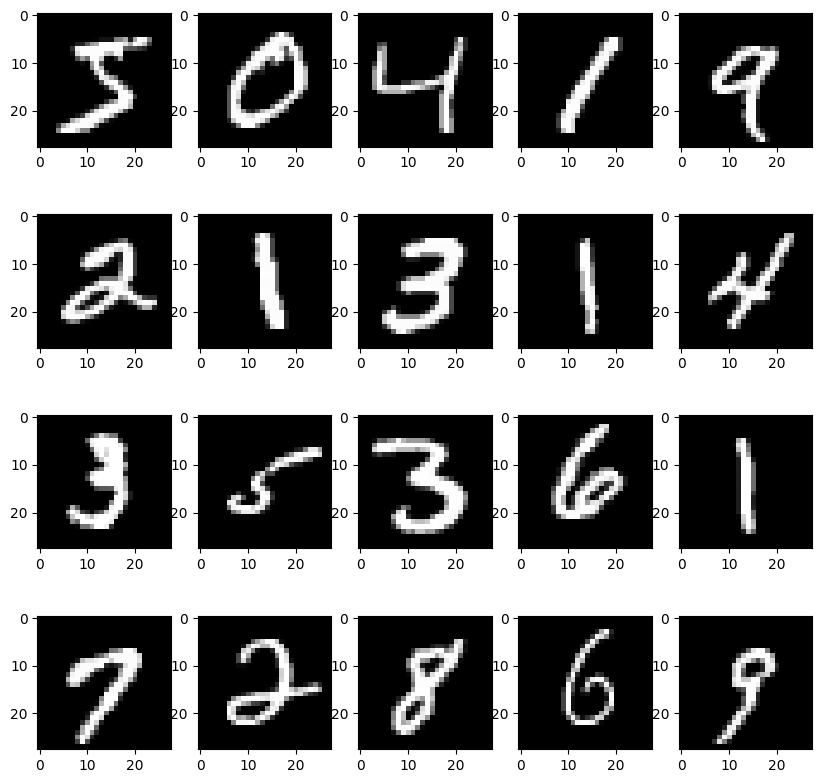

In [20]:
#Отрисовка первых 20 изображений из X_train
plt.figure(figsize =(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
#Примечание: если не добавлять параметр cmap='grey', то изображения будут с фиолетовым фоном и зеленой обводкой

In [21]:
'''Зададим начальные условия для генератора случайных чисел(опционально, полезно, 
если хотим получать одинаковый результат при обучении одной и той же нейронной сети)'''
np.random.seed(2000)

In [22]:
#Создаем модель сверточной нейронной сети
HIDDEN = 64
EPOCHS = 5
BATCH_SIZE = 128
DROPOUT = 0.2
VALIDATION_SPLIT = 0.2

model = models.Sequential()
#Добавляем слои свертки Conv2D и пулинга MaxPooling2D
model.add(layers.Conv2D(16, (3, 3), strides = (1, 1), padding = 'same', activation = 'relu', input_shape = (28, 28, 1), data_format = 'channels_last'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32, (3, 3), strides = (1, 1), padding = 'same', activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
#Приведем карты признаков(тензор) в вектор 
model.add(layers.Flatten())
#Добавляем обычный слой Dense и слой Dropout(для предотвращения переобучения)
model.add(layers.Dense(HIDDEN, activation ='relu'))
model.add(layers.Dropout(DROPOUT))
model.add(layers.Dense(num_classes, activation ='softmax'))
#Выводим краткую информацию про модель
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [23]:
#Настраивакм модель с оптимизатором Adam, функцией потерь категориальная кроссэнтропия и метрикой точности
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Обучаем, задаем входные данные, батч, кол-во эпох и размер выборки валидации
history = model.fit(X_train , Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_split = VALIDATION_SPLIT)

Epoch 1/5
375/375 [==============================] - 39s 102ms/step - loss: 0.3806 - accuracy: 0.8830 - val_loss: 0.0927 - val_accuracy: 0.9719
Epoch 2/5
375/375 [==============================] - 33s 88ms/step - loss: 0.0995 - accuracy: 0.9702 - val_loss: 0.0625 - val_accuracy: 0.9818
Epoch 3/5
375/375 [==============================] - 34s 91ms/step - loss: 0.0716 - accuracy: 0.9775 - val_loss: 0.0555 - val_accuracy: 0.9831
Epoch 4/5
375/375 [==============================] - 33s 87ms/step - loss: 0.0592 - accuracy: 0.9819 - val_loss: 0.0504 - val_accuracy: 0.9849
Epoch 5/5
375/375 [==============================] - 34s 91ms/step - loss: 0.0503 - accuracy: 0.9835 - val_loss: 0.0439 - val_accuracy: 0.9872


In [24]:
#Делаем проверку на тесте
score = model.evaluate(X_test, Y_test)
print("Значение потерь(LOSS): ", score[0])
print("Значение точности(ACCURACY): ", score[1])

313/313 [==============================] - 4s 12ms/step - loss: 0.0380 - accuracy: 0.9879
Значение потерь(LOSS):  0.038002971559762955
Значение точности(ACCURACY):  0.9879000186920166


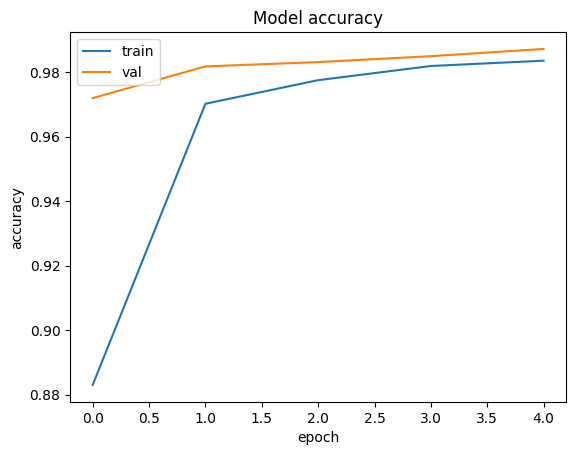

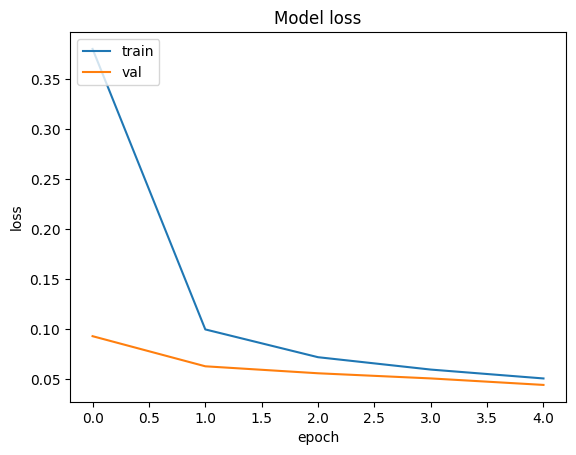

In [29]:
#Изобразим график точности
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Изобразим график потерь
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [30]:
#Получим карты признаков для первого изображения из X_train
layer_outputs = [layer.output for layer in model.layers[:4]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
acts = activation_model.predict(X_train[0:1])

1/1 [==============================] - 0s 95ms/step


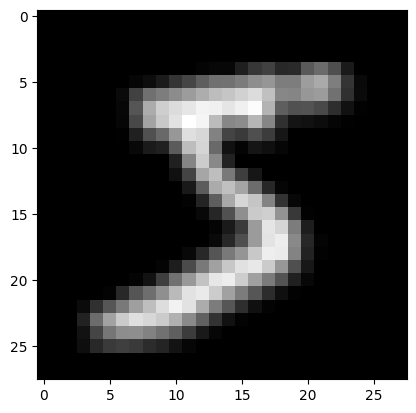

In [31]:
#Отобразим карту признаков на первом сверточном слое
first_layer_activation = acts[0]

plt.imshow(first_layer_activation[0, :, :, 0], cmap='gray')

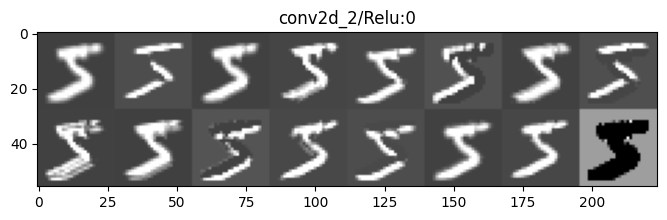

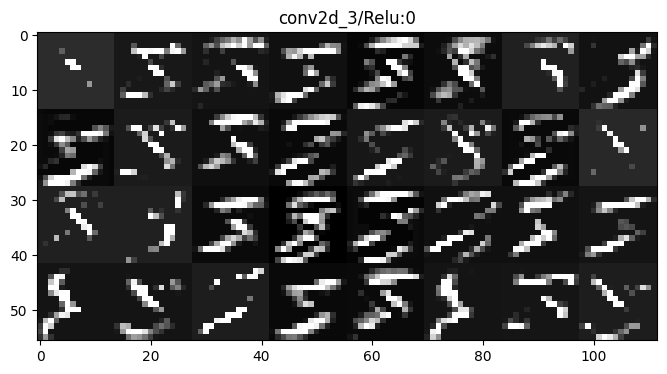

In [32]:
#Отобразим карты признаков на первом и втором сверточных слоях
images_per_row = 8

for layer_output, layer_activation in zip(layer_outputs, acts):
    if not layer_output.name.startswith('max'):
        # Количество фильтров в карте признаков
        n_features = layer_activation.shape[-1]

        # Признак имеет форму: (1, высота, ширина, n_features)
        size = layer_activation.shape[1]

        # Разместим результаты активации в виде сетки.
        # На каждой строке будет по images_per_row (8)
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        for col in range(n_cols):
            for row in range(images_per_row):
                # Фильтр:
                channel_image = layer_activation[0, :, :, col * images_per_row + row]
                # Постобработка, чтобы получить приемлимую визуализацию
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image

        # Визуализация результатов активации модели TensorFlow
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(layer_output.name)
        plt.imshow(display_grid, aspect='auto', cmap='gray')
plt.show()